### WebScraping 

Knihovna: `BeautifulSoup`

In [307]:
#!pip install BeautifulSoup4

In [308]:
import requests
from bs4 import BeautifulSoup

# Získáme HTML kód stránky
data = requests.get('https://mystore-testlab.coderslab.pl/').text

# HTML kód rozparsujeme pomocí knihovny BeatifulSoup
soup = BeautifulSoup(data, 'html.parser')

In [309]:
#sekce_kategorie = soup.find('div', class_ = 'row')

In [310]:
prvni_kategorie = soup.find('li', class_ = 'category').find('a', 'dropdown-item').text 

In [311]:
prvni_kategorie.replace('\n\n\n\ue313\n\ue316\n\n\n', '').replace('\n', '').strip()

'Clothes'

In [312]:
# Získáme všechny kategorie
list_kategorii = soup.find('ul', class_='top-menu')
list_odkazovych_tagu = list_kategorii.findAll('a', attrs={'data-depth':'0'})
# 1. způsob - list comprehension

#nazvy_kategorii = [prvek.text
#                   .replace('\n\n\n\ue313\n\ue316\n\n\n', '')
#                   .replace('\n', '')
#                   .strip() for prvek in list_odkazovych_tagu]

# 2. způsob - delší zápis for cyklu
nazvy_kategorii = []
# Inicializuju si list kategorie, do které budu vkládat slovník kategorie (url + název kategorie)
kategorie = []
for prvek in list_odkazovych_tagu:
    # získáváme očištěný název kategorie
    ocisteny_nazev_kategorie = prvek.text.replace('\n\n\n\ue313\n\ue316\n\n\n', '').replace('\n', '').strip()
    # získáváme url adresu
    odkaz = prvek['href']
    kategorie.append(
         {
            'nazev_kategorie': ocisteny_nazev_kategorie,
            'url': odkaz
         }
    )

kategorie

[{'nazev_kategorie': 'Clothes',
  'url': 'https://mystore-testlab.coderslab.pl/index.php?id_category=3&controller=category'},
 {'nazev_kategorie': 'Accessories',
  'url': 'https://mystore-testlab.coderslab.pl/index.php?id_category=6&controller=category'},
 {'nazev_kategorie': 'Art',
  'url': 'https://mystore-testlab.coderslab.pl/index.php?id_category=9&controller=category'}]

In [313]:
kategorie
import pandas as pd
df = pd.DataFrame(kategorie)
df.head()

,nazev_kategorie,url
0,Clothes,https://mystore-testlab.coderslab.pl/index.php...
1,Accessories,https://mystore-testlab.coderslab.pl/index.php...
2,Art,https://mystore-testlab.coderslab.pl/index.php...


In [314]:
def get_categories_urls():
    """
    Tahle funkce extrahuje ze stránky objekt kategorie s jejím názvem a url adresou.
    """
    import requests
    from bs4 import BeautifulSoup

    # Získáme HTML kód stránky
    data = requests.get('https://mystore-testlab.coderslab.pl/').text

    # HTML kód rozparsujeme pomocí knihovny BeatifulSoup
    soup = BeautifulSoup(data, 'html.parser')

    # Získáme všechny kategorie
    list_kategorii = soup.find('ul', class_='top-menu')
    list_odkazovych_tagu = list_kategorii.findAll('a', attrs={'data-depth':'0'})
    # 1. způsob - list comprehension

    #nazvy_kategorii = [prvek.text
    #                   .replace('\n\n\n\ue313\n\ue316\n\n\n', '')
    #                   .replace('\n', '')
    #                   .strip() for prvek in list_odkazovych_tagu]

    # 2. způsob - delší zápis for cyklu
    nazvy_kategorii = []
    # Inicializuju si list kategorie, do které budu vkládat slovník kategorie (url + název kategorie)
    kategorie = []
    for prvek in list_odkazovych_tagu:
        # získáváme očištěný název kategorie
        ocisteny_nazev_kategorie = prvek.text.replace('\n\n\n\ue313\n\ue316\n\n\n', '').replace('\n', '').strip()
        # získáváme url adresu
        odkaz = prvek['href']
        kategorie.append(
            {
                'nazev_kategorie': ocisteny_nazev_kategorie,
                'url': odkaz
            }
        )

    return kategorie

In [315]:
kategorie_webu = get_categories_urls()

In [316]:
kategorie_webu

[{'nazev_kategorie': 'Clothes',
  'url': 'https://mystore-testlab.coderslab.pl/index.php?id_category=3&controller=category'},
 {'nazev_kategorie': 'Accessories',
  'url': 'https://mystore-testlab.coderslab.pl/index.php?id_category=6&controller=category'},
 {'nazev_kategorie': 'Art',
  'url': 'https://mystore-testlab.coderslab.pl/index.php?id_category=9&controller=category'}]

In [317]:
pd.DataFrame(kategorie_webu)

,nazev_kategorie,url
0,Clothes,https://mystore-testlab.coderslab.pl/index.php...
1,Accessories,https://mystore-testlab.coderslab.pl/index.php...
2,Art,https://mystore-testlab.coderslab.pl/index.php...


### Získat cenu a název produktu pro danou kategorii (url adresu)

In [318]:
import requests
from bs4 import BeautifulSoup

url = 'https://mystore-testlab.coderslab.pl/index.php?id_category=3&controller=category'

def get_product_detail(url: str) -> list[dict]:
    """
    Funkce vrací detail produktu (cena, název) pro zvolenou url adresu (kategorii)
    """
    data = requests.get(url).text

    # Rozparsovat pomocí objektu beatifulSoup
    soup = BeautifulSoup(data, 'html.parser')

    products_container = soup.find('div', class_='products row')
    list_produktu = products_container.findAll('div', class_='js-product product col-xs-6 col-xl-4')

    seznam_produktu = []

    for produkt in list_produktu:
        # Najít a uložit cenu
        cena = produkt.find('span', class_='price').text.strip()
        # Najít a uložit název produktu
        nazev_produktu = produkt.find('h2', class_='h3 product-title').find('a').text
        slovnik = {
            'nazev_produktu': nazev_produktu,
            'cena': cena
        }
        seznam_produktu.append(slovnik)
    
    return seznam_produktu

In [319]:
get_product_detail('https://mystore-testlab.coderslab.pl/index.php?id_category=3&controller=category')

[{'nazev_produktu': 'Hummingbird printed t-shirt', 'cena': '€19.12'},
 {'nazev_produktu': 'Hummingbird printed sweater', 'cena': '€28.72'},
 {'nazev_produktu': '2nd Hummingbird printed...', 'cena': '€19.12'},
 {'nazev_produktu': '2nd Hummingbird printed...', 'cena': '€28.72'},
 {'nazev_produktu': 'Test kolorow', 'cena': '€0.00'}]

In [ ]:
get_product_detail('https://mystore-testlab.coderslab.pl/index.php?id_category=6&controller=category')

In [321]:
produkty_accessories = get_product_detail(url='https://mystore-testlab.coderslab.pl/index.php?id_category=6&controller=category')

In [322]:
# Převedeme to DataFrame
import pandas as pd
df = pd.DataFrame(produkty_accessories)

df.head()

# Ze sloupce cena odstranit znak eura
df['cena'] = df['cena'].str.replace('€', '').astype(float)

In [323]:
df.head()

,nazev_produktu,cena
0,Mug The adventure begins,11.9
1,Mug The best is yet to come,11.9
2,Mug Today is a good day,11.9
3,Brown bear cushion,18.9
4,Mountain fox cushion,18.9


In [324]:
# Vypočítat průměrnou cenu
prumerna_cena = df['cena'].mean()
print(f'Průměrná cena produktů je: {prumerna_cena}€')
# Zjistit maximální cenu produktu
maximalni_cena = df['cena'].max()
print(f'Maximální cena produktu je: {maximalni_cena}€')

Průměrná cena produktů je: 16.075€
Maximální cena produktu je: 35.0€


In [325]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12 entries, 0 to 11
Data columns (total 2 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   nazev_produktu  12 non-null     object 
 1   cena            12 non-null     float64
dtypes: float64(1), object(1)
memory usage: 324.0+ bytes


### WebScraping: URL: https://www.music-to-scrape.org/

In [ ]:
import requests
from bs4 import BeautifulSoup

data = requests.get('https://www.music-to-scrape.org/').text

soup = BeautifulSoup(data, 'html.parser')

sekce_top_15 = soup.find('section', class_='my-4').findAll('div', class_='row')[1]

In [ ]:
list_divu_pisnicky = sekce_top_15.findAll('div', class_='list-group-item list-group-item-action border')
top_15 = []
for div in list_divu_pisnicky:
    # Najdi jméno autora písničky
    autor = div.find('div', class_='center-vertical center-text').find('h5').text
    # Najdi jméno písničky
    nazev_pisnicky = div.find('div', class_='center-vertical center-text').find('p').text
    # Najdi pořadí v žebříčku
    poradi_v_zebricku = div.find('div', class_='center-vertical text-center').find('h2').text

    # Vytvořit objekt pisnicky s informaci autor,nazev,poradi a pro kazdy song v zebricku tento objekt ulozit do listu top_15
    top_15.append(
        {
            'Autor': autor,
            'Název píšničky': nazev_pisnicky,
            'Pořadí v TOP 15:': poradi_v_zebricku
        }
   )

top_15

In [ ]:
pd.DataFrame(top_15)

,Autor,Název píšničky,Pořadí v TOP 15:
0,Tito Puente,China,1
1,DJ Quik,Pacific Coast Remix,2
2,Babylon Disco,Funk You,3
3,Billie Jo Spears,It Makes No Difference Now,4
4,Stevie Ray Vaughan And Double Trouble,Tin Pan Alley (aka Roughest Place In Town),5
5,Charlie McCoy,Blue Yodel No. 1(T For Texas),6
6,Muse,Exogenesis: Symphony Part 1 [Overture],7
7,Les Bonapartes,Welcome,8
8,Little Joe & The Thrillers,Peanuts,9
9,Spectra Soul,The Tube,10


In [ ]:
data = requests.get('https://alza.cz/').text

### ETL

Část Extract

Albatros - URL: https://albatros.cz/bestsellery/

1. krok: Ze všech dostupných knih získat odkaz na detail knihy (protože neznáme cenu)
2. krok: Pro každou url knihy, kterou získáme v prvním kroku, zjistíme její cenu ...

Krok č. 1

In [328]:
import requests
from bs4 import BeautifulSoup

def ziskej_url_knih() -> list[str]:
    """
    Z webu albatros.cz získá url adresy na detail knih, které se na stránce vyskytují
    """
    data = requests.get('https://albatros.cz/bestsellery/').text
    soup = BeautifulSoup(data, 'html.parser')

    # Najdi všechny knihy na stránce
    list_knih = soup.findAll('article', class_='p-l__item')

    url_adresy = []
    for kniha in list_knih:
        # Zjisti url adresu
        odkaz_tag = kniha.find('h2', class_='p-l-i__title').find('a')
        link = 'https://albatros.cz' + odkaz_tag['href']
        url_adresy.append(link)

    return url_adresy


2. krok - pro každou url z listu si načteme data z dané url (získáme HTML kód), najdeme cenu pro tuto knihu a uložíme

In [330]:
def zjisti_detaily_knihy(url_knih: list[str]) -> list[dict]:
    # Inicializuji list pro uložení objektů knih
    knihy = []

    for url in url_knih:
        #print('Odbavuju další knihu...')
        # Potřebujeme získat HTML kód
        data = requests.get(url).text
        soup = BeautifulSoup(data, 'html.parser')
        # Zjišťujeme cenu
        cena = soup.find('span', class_='text-nowrap').text.strip()
        
        # Zjišťujeme název knihy
        nazev_knihy = soup.find('div', class_='product__descriptions').find('h1').text
        
        # Zjišťujeme kategorii knihy
        dostupnost = soup.find('span', 'prod__available').text.strip()

        # Zjišťujeme žánr knihy
        list_zanru = soup.find('div', 'product__param').findAll('span')[1].findAll('a')
        #list comprehension
        zanry = [zanr.text for zanr in list_zanru]
        zanry_string = ', '.join(zanry)

        # Zjistit počet stran
        pocet_stran = soup.findAll('div', 'product__param')[1].find('span', class_='text-nowrap').text.strip()

        # Zjistit Datum vydání
        datum_vydani = soup.findAll('div', 'product__param')[3].findAll('span')[1].text.replace('\r\n', '')

        # Zjisti jméno autora
        list_autoru = soup.find('h3', 'product__author').findAll('a', 'author')
        autori = [autor.text for autor in list_autoru]
        autori_string = ', '.join(autori)

        objekt_kniha = {
            'Cena': cena,
            'Název knihy': nazev_knihy,
            'Dostupnost': dostupnost,
            'Žánr': zanry_string,
            'Počet stran': pocet_stran,
            'Datum vydání': datum_vydani,
            'Autor': autori_string
        }

        knihy.append(objekt_kniha)
        #print('Úspěšně jsem odbavil knihu.')

    return knihy

Spouštíme kód

In [ ]:
# Uložit url adresy knih
url_knih = ziskej_url_knih()

In [ ]:
# Pro všechny url adresy chci získat detail knih
detail_knih = zjisti_detaily_knihy(url_knih)

Část Transform

In [ ]:
import pandas as pd

df = pd.DataFrame(detail_knih)
df.head()

,Cena,Název knihy,Dostupnost,Žánr,Počet stran,Datum vydání,Autor
0,999 Kč,Harry Potter a Kámen mudrců - MinaLima,V prodeji,"dobrodružství pro děti, fantasy pro děti",368,04.11.2024,J. K. Rowlingová
1,449 Kč,Harry Potter: Vánoce v Bradavicích,V prodeji,"obrázková kniha, fantasy pro děti",48,21.10.2024,J. K. Rowlingová
2,299 Kč,Vánoce v Šípkové ulici,V prodeji,"humor pro děti, pohádka, příběhy dětí",56,21.10.2024,Alena Mornštajnová
3,999 Kč,Rychlé šípy: Původní kresby a scénáře Jaroslav...,V prodeji,"dobrodružství pro děti, humor pro děti, komiks",240,02.12.2024,"Pavel Kořínek, Jaroslav Foglar"
4,499 Kč,Bajky barda Beedleho - ilustrované vydání,V prodeji,fantasy pro děti,160,08.10.2018,J. K. Rowlingová


In [ ]:
df.to_csv('knihy_predzpracovana_data.csv')

### Část 2 - processing dat (čištění)

In [ ]:
df.head()

,Cena,Název knihy,Dostupnost,Žánr,Počet stran,Datum vydání,Autor
0,999 Kč,Harry Potter a Kámen mudrců - MinaLima,V prodeji,"dobrodružství pro děti, fantasy pro děti",368,04.11.2024,J. K. Rowlingová
1,449 Kč,Harry Potter: Vánoce v Bradavicích,V prodeji,"obrázková kniha, fantasy pro děti",48,21.10.2024,J. K. Rowlingová
2,299 Kč,Vánoce v Šípkové ulici,V prodeji,"humor pro děti, pohádka, příběhy dětí",56,21.10.2024,Alena Mornštajnová
3,999 Kč,Rychlé šípy: Původní kresby a scénáře Jaroslav...,V prodeji,"dobrodružství pro děti, humor pro děti, komiks",240,02.12.2024,"Pavel Kořínek, Jaroslav Foglar"
4,499 Kč,Bajky barda Beedleho - ilustrované vydání,V prodeji,fantasy pro děti,160,08.10.2018,J. K. Rowlingová


In [ ]:
df.info()

#### Získat správné datové typy

Pomocí metody rozdělit Cenu do 2 sloupců - Cena a Měna

In [ ]:
df['Měna'] = df['Cena'].str.split().str[1]
df['Cena'] = df['Cena'].str.split().str[0].astype(float)

In [ ]:
df.info()

Přetypovat počet stran na celé číslo

In [ ]:
df['Počet stran'] = df['Počet stran'].astype(int)

Přetypovat Datum vydání na datetime

In [ ]:
df['Datum vydání'] = pd.to_datetime(df['Datum vydání'], format='mixed', errors='coerce') # %d.%m.%Y

Pomocí metody replace odmazat měnu a přetypovat na float

In [ ]:
df['Cena'] = (df['Cena']
              .str.replace(' Kč', '')
              .str.strip()
              .astype(float))

In [ ]:
text = 'Pavel Kořínek, Jaroslav Foglar'
list_autoru = text.split(',')
len(list_autoru)

2

Do nového sloupce dostat informaci o počtu autorů daného díla

In [ ]:
df['Počet autorů'] = df['Autor'].str.split(',').str.len()
#df['Autor'].apply(len)

In [ ]:
df.head()

,Cena,Název knihy,Dostupnost,Žánr,Počet stran,Datum vydání,Autor,Měna,Počet autorů
0,999.0,Harry Potter a Kámen mudrců - MinaLima,V prodeji,"dobrodružství pro děti, fantasy pro děti",368,2024-04-11,J. K. Rowlingová,Kč,1
1,449.0,Harry Potter: Vánoce v Bradavicích,V prodeji,"obrázková kniha, fantasy pro děti",48,2024-10-21,J. K. Rowlingová,Kč,1
2,299.0,Vánoce v Šípkové ulici,V prodeji,"humor pro děti, pohádka, příběhy dětí",56,2024-10-21,Alena Mornštajnová,Kč,1
3,999.0,Rychlé šípy: Původní kresby a scénáře Jaroslav...,V prodeji,"dobrodružství pro děti, humor pro děti, komiks",240,2024-02-12,"Pavel Kořínek, Jaroslav Foglar",Kč,2
4,499.0,Bajky barda Beedleho - ilustrované vydání,V prodeji,fantasy pro děti,160,2018-08-10,J. K. Rowlingová,Kč,1


Load

In [ ]:
df.to_csv('data_knihy_ETL.csv')

Fáze datové analýzy

In [348]:
import pandas as pd
df = pd.read_csv('data_knihy_ETL.csv')

Sada příkladů pro samostatnou práci

In [353]:
# 1. Zjistit průměrnou cenu knih
prumerna_cena = df['Cena'].mean()
print(f'Průměrná cena knih je: {prumerna_cena} Kč')

Průměrná cena knih je: 393.0 Kč


In [349]:
# 1. Zjistit průměrnou cenu knih
prumerna_cena = df['Cena'].mean()

# 2. Zjistit počet dostupných a nedostupných knih
df['Dostupnost'].value_counts()
#df.groupby('Dostupnost')['Název knihy'].count()

# 3. Najít knihu s nejmenším počtem stran
min_pocet_stran = df['Počet stran'].min()
df.loc[ df['Počet stran'] == min_pocet_stran ]

# 4. Najít knihu s největším počtem autorů
df.loc[ df['Počet autorů'] == df['Počet autorů'].max() ]
df.nlargest(columns='Počet autorů', n=1)
df.sort_values(by='Počet autorů', ascending=False).head(1)

# 5. Zjistit, kolik každý autor/kombinace autorů vydal knih
df['Autor'].value_counts().reset_index(name='Počet knih')

# 6. Vytvořit nový sloupec Rok vydání 
df['Datum vydání'] = pd.to_datetime(df['Datum vydání'], format='mixed', errors='coerce')
df['Rok vydání'] = df['Datum vydání'].dt.year

# 7. Zjistit, kolik knih bylo v každém roce vydáno
pocet_knih_roky = df['Rok vydání'].value_counts().reset_index(name='Počet knih')

# 8. Najít rok, ve kterém se vydalo nejvíce knih
pocet_knih_roky.nlargest(n=1, columns='Počet knih')
pocet_knih_roky.loc[ pocet_knih_roky['Počet knih'] == pocet_knih_roky['Počet knih'].max() ]

,Rok vydání,Počet knih
0,2023.0,8


In [338]:
radek_ke_smazani = df.loc[ df['Rok vydání'].isnull() ].index
df.drop(index=radek_ke_smazani, inplace=True)

In [339]:
df['Rok vydání'] = df['Rok vydání'].astype(int)

`.to_numeric()` umožňuje přeskakovat hodnoty, které nelze přetypovat díky parametru `errors`

In [340]:
df['Rok vydání'] = pd.to_numeric(df['Rok vydání'], errors='coerce', downcast='integer').astype('Int64')

In [341]:
df.head()

,Unnamed: 0,Cena,Název knihy,Dostupnost,Žánr,Počet stran,Datum vydání,Autor,Měna,Počet autorů,Rok vydání
0,0,999.0,Harry Potter a Kámen mudrců - MinaLima,V prodeji,"dobrodružství pro děti, fantasy pro děti",368,2024-04-11,J. K. Rowlingová,Kč,1,2024
1,1,449.0,Harry Potter: Vánoce v Bradavicích,V prodeji,"obrázková kniha, fantasy pro děti",48,2024-10-21,J. K. Rowlingová,Kč,1,2024
2,2,299.0,Vánoce v Šípkové ulici,V prodeji,"humor pro děti, pohádka, příběhy dětí",56,2024-10-21,Alena Mornštajnová,Kč,1,2024
3,3,999.0,Rychlé šípy: Původní kresby a scénáře Jaroslav...,V prodeji,"dobrodružství pro děti, humor pro děti, komiks",240,2024-02-12,"Pavel Kořínek, Jaroslav Foglar",Kč,2,2024
4,4,499.0,Bajky barda Beedleho - ilustrované vydání,V prodeji,fantasy pro děti,160,2018-08-10,J. K. Rowlingová,Kč,1,2018


In [345]:
df = df[['Autor', 'Název knihy', 'Dostupnost', 'Žánr', 'Datum vydání', 'Cena', 'Měna', 'Počet stran', 'Počet autorů', 'Rok vydání']]
df.to_excel('final_data.xlsx')

COVID dataset

In [ ]:
import pandas as pd
df = pd.read_csv('testy-pcr-antigenni.csv')
df.head()

In [358]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1699 entries, 0 to 1698
Data columns (total 17 columns):
 #   Column                                      Non-Null Count  Dtype  
---  ------                                      --------------  -----  
 0   id                                          1699 non-null   object 
 1   datum                                       1699 non-null   object 
 2   pocet_PCR_testy                             1699 non-null   int64  
 3   pocet_AG_testy                              1699 non-null   int64  
 4   typologie_test_indik_diagnosticka           1699 non-null   int64  
 5   typologie_test_indik_epidemiologicka        1699 non-null   int64  
 6   typologie_test_indik_preventivni            1699 non-null   int64  
 7   typologie_test_indik_ostatni                1699 non-null   int64  
 8   incidence_pozitivni                         1687 non-null   float64
 9   pozit_typologie_test_indik_diagnosticka     1687 non-null   float64
 10  pozit_typolo

In [ ]:
df.head()

In [361]:
## Přetypovat sloupec datum na datetime
df['datum'] = pd.to_datetime(df['datum'])
df.head(2)

,id,datum,pocet_PCR_testy,pocet_AG_testy,typologie_test_indik_diagnosticka,typologie_test_indik_epidemiologicka,typologie_test_indik_preventivni,typologie_test_indik_ostatni,incidence_pozitivni,pozit_typologie_test_indik_diagnosticka,pozit_typologie_test_indik_epidemiologicka,pozit_typologie_test_indik_preventivni,pozit_typologie_test_indik_ostatni,PCR_pozit_sympt,PCR_pozit_asymp,AG_pozit_symp,AG_pozit_asymp_PCR_conf
0,c9b46ae9-99b5-4ef9-8c55-b5c7888e25ae,2020-06-01,6528,0,7,1138,3,5380,34.0,0.0,3.0,0.0,31.0,0.0,5.0,0.0,0.0
1,3653691e-1486-4b1f-91e3-99810e21e039,2020-06-02,5550,0,9,932,15,4594,66.0,0.0,12.0,0.0,54.0,0.0,40.0,0.0,0.0


In [ ]:
# Průměrný počet PCR testů
prumerny_pocet_pcr = df['pocet_PCR_testy'].mean()
print(f'Průměrný počet PCR testů: {prumerny_pocet_pcr:.2f}/den')
# Medián počtu PCR testů
median_pcr = df['pocet_PCR_testy'].median()
print(f'Mediánový počet PCR testů: {median_pcr}/den')

Průměrný počet PCR testů: 12860.25/den
Mediánový počet PCR testů: 1844.0/den


In [372]:
# Nový sloupec Rok
df['Rok'] = df['datum'].dt.year

# Celkový počet PCR testů v každém roce -> seskupovat data
seskupena_data_rok = df.groupby('Rok')['pocet_PCR_testy'].sum().reset_index(name='Celkový počet PCR testů')
seskupena_data_rok

,Rok,Celkový počet PCR testů
0,2020,3366548
1,2021,11964117
2,2022,6265110
3,2023,157743
4,2024,88727
5,2025,7321


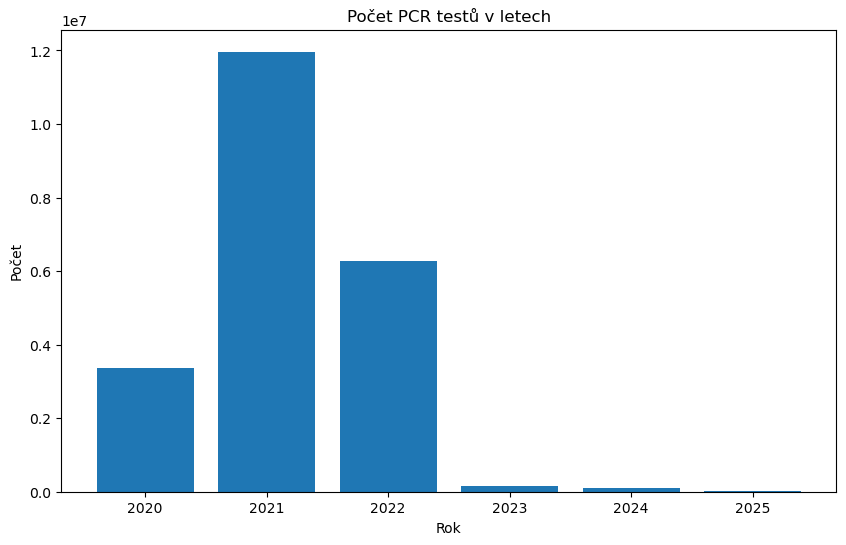

In [377]:
# Sloupcový graf
from matplotlib import pyplot as plt
#import matplotlib.pyplot as plt

plt.figure(figsize=(10,6))

plt.bar(seskupena_data_rok['Rok'], seskupena_data_rok['Celkový počet PCR testů'])
plt.title('Počet PCR testů v letech')
plt.xlabel('Rok')
plt.ylabel('Počet')

plt.show()